<a href="https://colab.research.google.com/github/KC-Night/DS-3001-Final-/blob/main/DS_3001_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
covid_df=pd.read_csv('Covid19_Data.csv')

In [ ]:
covid_df.head()

cdc_report_dt      age_group race_ethnicity_combined hosp_yn icu_yn  \
0    2023/10/17  20 - 29 Years     Black, Non-Hispanic      No     No   
1    2020/11/17  20 - 29 Years     Black, Non-Hispanic      No     No   
2    2021/03/31  20 - 29 Years     Black, Non-Hispanic      No     No   
3    2021/01/12  20 - 29 Years     Black, Non-Hispanic      No     No   
4    2020/11/17  20 - 29 Years     Black, Non-Hispanic     Yes     No   

  death_yn medcond_yn  
0       No         No  
1       No         No  
2       No        Yes  
3       No         No  
4       No         No

In [ ]:
covid_df = covid_df.replace('Missing',np.nan) #drop rows with missing and unknown values
covid_df = covid_df.replace('Unknown',np.nan)
covid_df.dropna(inplace=True)

In [ ]:
covid_df['race_ethnicity_combined'].unique() #check values of race/ethnicity

array(['Black, Non-Hispanic', 'Asian, Non-Hispanic',
       'White, Non-Hispanic', 'Multiple/Other, Non-Hispanic',
       'Hispanic/Latino',
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic',
       'American Indian/Alaska Native, Non-Hispanic'], dtype=object)

In [ ]:
race_dummies =pd.get_dummies(covid_df['race_ethnicity_combined'], prefix='race', dtype=int) #one hot encode race for tree
covid_df = pd.concat([covid_df, race_dummies], axis=1)

In [ ]:
covid_df.head()

cdc_report_dt      age_group race_ethnicity_combined hosp_yn icu_yn  \
0    2023/10/17  20 - 29 Years     Black, Non-Hispanic      No     No   
1    2020/11/17  20 - 29 Years     Black, Non-Hispanic      No     No   
2    2021/03/31  20 - 29 Years     Black, Non-Hispanic      No     No   
3    2021/01/12  20 - 29 Years     Black, Non-Hispanic      No     No   
4    2020/11/17  20 - 29 Years     Black, Non-Hispanic     Yes     No   

  death_yn medcond_yn  race_American Indian/Alaska Native, Non-Hispanic  \
0       No         No                                                 0   
1       No         No                                                 0   
2       No        Yes                                                 0   
3       No         No                                                 0   
4       No         No                                                 0   

   race_Asian, Non-Hispanic  race_Black, Non-Hispanic  race_Hispanic/Latino  \
0                         0                         1                     0   
1                         0                         1                     0   
2                         0                         1                     0   
3                         0                         1                     0   
4                         0                         1                     0   

   race_Multiple/Other, Non-Hispanic  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   race_Native Hawaiian/Other Pacific Islander, Non-Hispanic  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

   race_White, Non-Hispanic  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0

In [ ]:
#rename one hot encode columns
covid_df = covid_df.rename(columns={
    "race_American Indian/Alaska Native, Non-Hispanic": "American Indian/Alaska Native, Non-Hispanic_Binary",
    "race_Asian, Non-Hispanic": "Asian, Non-Hispanic_Binary",
    "race_Black, Non-Hispanic": "Black, Non-Hispanic_Binary",
    "race_Hispanic": "Hispanic_Binary",
    "race_Native Hawaiian/Other Pacific Islander, Non-Hispanic": "Native Hawaiian/Other Pacific Islander, Non-Hispanic_Binary",
    "race_White, Non-Hispanic": "White, Non-Hispanic_Binary",
    "race_Multiple/Other, Non-Hispanic": "Multiple/Other, Non-Hispanic_Binary",
    "race_Hispanic/Latino": "Hispanic/Latino_Binary"
})

In [ ]:
covid_df.head()

cdc_report_dt      age_group race_ethnicity_combined hosp_yn icu_yn  \
0    2023/10/17  20 - 29 Years     Black, Non-Hispanic      No     No   
1    2020/11/17  20 - 29 Years     Black, Non-Hispanic      No     No   
2    2021/03/31  20 - 29 Years     Black, Non-Hispanic      No     No   
3    2021/01/12  20 - 29 Years     Black, Non-Hispanic      No     No   
4    2020/11/17  20 - 29 Years     Black, Non-Hispanic     Yes     No   

  death_yn medcond_yn  American Indian/Alaska Native, Non-Hispanic_Binary  \
0       No         No                                                  0    
1       No         No                                                  0    
2       No        Yes                                                  0    
3       No         No                                                  0    
4       No         No                                                  0    

   Asian, Non-Hispanic_Binary  Black, Non-Hispanic_Binary  \
0                           0                           1   
1                           0                           1   
2                           0                           1   
3                           0                           1   
4                           0                           1   

   Hispanic/Latino_Binary  Multiple/Other, Non-Hispanic_Binary  \
0                       0                                    0   
1                       0                                    0   
2                       0                                    0   
3                       0                                    0   
4                       0                                    0   

   Native Hawaiian/Other Pacific Islander, Non-Hispanic_Binary  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   White, Non-Hispanic_Binary  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [ ]:
# put one hot encoded columns into new dataframe
race_df=covid_df.drop(['cdc_report_dt', 'age_group','race_ethnicity_combined', 'hosp_yn', 'icu_yn','death_yn','medcond_yn'], axis=1)
race_df.head()

American Indian/Alaska Native, Non-Hispanic_Binary  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   Asian, Non-Hispanic_Binary  Black, Non-Hispanic_Binary  \
0                           0                           1   
1                           0                           1   
2                           0                           1   
3                           0                           1   
4                           0                           1   

   Hispanic/Latino_Binary  Multiple/Other, Non-Hispanic_Binary  \
0                       0                                    0   
1                       0                                    0   
2                       0                                    0   
3                       0                                    0   
4                       0                                    0   

   Native Hawaiian/Other Pacific Islander, Non-Hispanic_Binary  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   White, Non-Hispanic_Binary  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [ ]:
covid_df['age_group'].unique() #check values of age

array(['20 - 29 Years', '50 - 59 Years', '10 - 19 Years', '60 - 69 Years',
       '40 - 49 Years', '30 - 39 Years'], dtype=object)

In [ ]:
age_dummies =pd.get_dummies(covid_df['age_group'], prefix='age', dtype=int) #one hot encode age for tree
covid_df = pd.concat([covid_df, age_dummies], axis=1)

In [ ]:
covid_df.head()

cdc_report_dt      age_group race_ethnicity_combined hosp_yn icu_yn  \
0    2023/10/17  20 - 29 Years     Black, Non-Hispanic      No     No   
1    2020/11/17  20 - 29 Years     Black, Non-Hispanic      No     No   
2    2021/03/31  20 - 29 Years     Black, Non-Hispanic      No     No   
3    2021/01/12  20 - 29 Years     Black, Non-Hispanic      No     No   
4    2020/11/17  20 - 29 Years     Black, Non-Hispanic     Yes     No   

  death_yn medcond_yn  American Indian/Alaska Native, Non-Hispanic_Binary  \
0       No         No                                                  0    
1       No         No                                                  0    
2       No        Yes                                                  0    
3       No         No                                                  0    
4       No         No                                                  0    

   Asian, Non-Hispanic_Binary  Black, Non-Hispanic_Binary  \
0                           0                           1   
1                           0                           1   
2                           0                           1   
3                           0                           1   
4                           0                           1   

   Hispanic/Latino_Binary  Multiple/Other, Non-Hispanic_Binary  \
0                       0                                    0   
1                       0                                    0   
2                       0                                    0   
3                       0                                    0   
4                       0                                    0   

   Native Hawaiian/Other Pacific Islander, Non-Hispanic_Binary  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   White, Non-Hispanic_Binary  age_10 - 19 Years  age_20 - 29 Years  \
0                           0                  0                  1   
1                           0                  0                  1   
2                           0                  0                  1   
3                           0                  0                  1   
4                           0                  0                  1   

   age_30 - 39 Years  age_40 - 49 Years  age_50 - 59 Years  age_60 - 69 Years  
0                  0                  0                  0                  0  
1                  0                  0                  0                  0  
2                  0                  0                  0                  0  
3                  0                  0                  0                  0  
4                  0                  0                  0                  0

In [ ]:
#rename one hot encode columns
covid_df = covid_df.rename(columns={
    "age_10 - 19 Years": "age_10 - 19 Years_Binary",
    "age_20 - 29 Years": "age_20 - 29 Years_Binary",
    "age_30 - 39 Years": "age_30 - 39 Years_Binary",
    "age_40 - 49 Years": "age_40 - 49 Years_Binary",
    "age_50 - 59 Years": "age_50 - 59 Years_Binary",
    "age_60 - 69 Years": "age_60 - 69 Years_Binary",
})

In [ ]:
# put one hot encoded columns into new dataframe
age_df=covid_df[['age_10 - 19 Years_Binary','age_20 - 29 Years_Binary','age_30 - 39 Years_Binary','age_40 - 49 Years_Binary','age_50 - 59 Years_Binary','age_60 - 69 Years_Binary']]
age_df.head()

age_10 - 19 Years_Binary  age_20 - 29 Years_Binary  \
0                         0                         1   
1                         0                         1   
2                         0                         1   
3                         0                         1   
4                         0                         1   

   age_30 - 39 Years_Binary  age_40 - 49 Years_Binary  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   age_50 - 59 Years_Binary  age_60 - 69 Years_Binary  
0                         0                         0  
1                         0                         0  
2                         0                         0  
3                         0                         0  
4                         0                         0

In [ ]:
# convert death, icu, and hosp to binary
covid_df['death_yn']=covid_df['death_yn'].str.strip().astype(str).str.title()
covid_df['icu_yn']=covid_df['icu_yn'].str.strip().astype(str).str.title()
covid_df['hosp_yn']=covid_df['hosp_yn'].str.strip().astype(str).str.title()
covid_df['death_binary'] = covid_df['death_yn'].map({'Yes': 1, 'No': 0})
covid_df['icu_binary'] = covid_df['icu_yn'].map({'Yes': 1, 'No': 0})
covid_df['hosp_binary'] = covid_df['hosp_yn'].map({'Yes': 1, 'No': 0})

In [ ]:
covid_df.head()

cdc_report_dt      age_group race_ethnicity_combined hosp_yn icu_yn  \
0    2023/10/17  20 - 29 Years     Black, Non-Hispanic      No     No   
1    2020/11/17  20 - 29 Years     Black, Non-Hispanic      No     No   
2    2021/03/31  20 - 29 Years     Black, Non-Hispanic      No     No   
3    2021/01/12  20 - 29 Years     Black, Non-Hispanic      No     No   
4    2020/11/17  20 - 29 Years     Black, Non-Hispanic     Yes     No   

  death_yn medcond_yn  American Indian/Alaska Native, Non-Hispanic_Binary  \
0       No         No                                                  0    
1       No         No                                                  0    
2       No        Yes                                                  0    
3       No         No                                                  0    
4       No         No                                                  0    

   Asian, Non-Hispanic_Binary  Black, Non-Hispanic_Binary  ...  \
0                           0                           1  ...   
1                           0                           1  ...   
2                           0                           1  ...   
3                           0                           1  ...   
4                           0                           1  ...   

   White, Non-Hispanic_Binary  age_10 - 19 Years_Binary  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   age_20 - 29 Years_Binary  age_30 - 39 Years_Binary  \
0                         1                         0   
1                         1                         0   
2                         1                         0   
3                         1                         0   
4                         1                         0   

   age_40 - 49 Years_Binary  age_50 - 59 Years_Binary  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   age_60 - 69 Years_Binary  death_binary  icu_binary  hosp_binary  
0                         0             0           0            0  
1                         0             0           0            0  
2                         0             0           0            0  
3                         0             0           0            0  
4                         0             0           0            1  

[5 rows x 23 columns]

In [ ]:
# basic data description
covid_df.describe()

American Indian/Alaska Native, Non-Hispanic_Binary  \
count                                      939174.000000    
mean                                            0.005259    
std                                             0.072327    
min                                             0.000000    
25%                                             0.000000    
50%                                             0.000000    
75%                                             0.000000    
max                                             1.000000    

       Asian, Non-Hispanic_Binary  Black, Non-Hispanic_Binary  \
count               939174.000000               939174.000000   
mean                     0.021971                    0.117971   
std                      0.146590                    0.322574   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.000000                    0.000000   
75%                      0.000000                    0.000000   
max                      1.000000                    1.000000   

       Hispanic/Latino_Binary  Multiple/Other, Non-Hispanic_Binary  \
count           939174.000000                        939174.000000   
mean                 0.121316                             0.020926   
std                  0.326495                             0.143136   
min                  0.000000                             0.000000   
25%                  0.000000                             0.000000   
50%                  0.000000                             0.000000   
75%                  0.000000                             0.000000   
max                  1.000000                             1.000000   

       Native Hawaiian/Other Pacific Islander, Non-Hispanic_Binary  \
count                                      939174.000000             
mean                                            0.004523             
std                                             0.067102             
min                                             0.000000             
25%                                             0.000000             
50%                                             0.000000             
75%                                             0.000000             
max                                             1.000000             

       White, Non-Hispanic_Binary  age_10 - 19 Years_Binary  \
count               939174.000000             939174.000000   
mean                     0.708034                  0.140247   
std                      0.454667                  0.347243   
min                      0.000000                  0.000000   
25%                      0.000000                  0.000000   
50%                      1.000000                  0.000000   
75%                      1.000000                  0.000000   
max                      1.000000                  1.000000   

       age_20 - 29 Years_Binary  age_30 - 39 Years_Binary  \
count             939174.000000             939174.000000   
mean                   0.178760                  0.166536   
std                    0.383152                  0.372561   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                    1.000000                  1.000000   

       age_40 - 49 Years_Binary  age_50 - 59 Years_Binary  \
count              939174.00000             939174.000000   
mean                    0.16152                  0.175475   
std                     0.36801                  0.380373   
min                     0.00000                  0.000000   
25%                     0.00000                  0.000000   
50%                     0.00000                  0.000000   
75%                     0.00000                  0.000000   
max

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

Model 1 - Hospitalization

In [ ]:
# look at underlying medical condition, race, and age to see how likely is hospitalization

# convert medcond to binary
if 'medcond_binary' not in covid_df.columns:
    covid_df['medcond_binary'] = covid_df['medcond_yn'].replace({'No': 0, 'Yes': 1}).astype(int)

race_binary_cols = [col for col in race_df.columns if '_Binary' in col]
age_binary_cols = [col for col in age_df.columns if '_Binary' in col]

# combine all feature column names into a single flat list
feature_cols = race_binary_cols + age_binary_cols + ['medcond_binary']

# Select features for X
X = covid_df[feature_cols]

# Set the target variable y, using the already converted 'hosp_binary'
y = covid_df['hosp_binary']

/tmp/ipython-input-22936629.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_df['medcond_binary'] = covid_df['medcond_yn'].replace({'No': 0, 'Yes': 1}).astype(int)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# establish baseline using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline

reg = LogisticRegression(penalty = None,
                         fit_intercept=True,
                         class_weight="balanced", # handle imbalance
                         solver = 'lbfgs',
                         max_iter=500).fit(X,y)   # avoid convergence issues

# predictions
y_pred = reg.predict(X_test)
y_prob = reg.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred)) #70.04%
print("ROC AUC:", roc_auc_score(y_test, y_prob)) #78.51%
print(classification_report(y_test, y_pred)) # precision + recall tells us that model is better at identifying hospitalized patients (high recall) than being precise

Accuracy: 0.7004871296616711
ROC AUC: 0.7850788201414046
              precision    recall  f1-score   support

           0       0.95      0.69      0.80    162330
           1       0.28      0.75      0.40     25505

    accuracy                           0.70    187835
   macro avg       0.61      0.72      0.60    187835
weighted avg       0.86      0.70      0.75    187835



In [ ]:
# compare tree to baseline
tree = DecisionTreeClassifier(
    min_samples_leaf=10,       # prevent tiny leaves
    class_weight="balanced",   # handle class imbalance
    max_depth=None,            # let it grow fully, we can tune later
    random_state=42
)

tree.fit(X_train, y_train)

y_pred_tree =tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:, 1]

cm1 = pd.crosstab(y_test, y_pred_tree, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix:\n", cm1)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob_tree))
print(classification_report(y_test, y_pred_tree))
# overall very similar to baseline, but can tune tree to capture other patterns and interpretability

Confusion Matrix:
 Predicted       0      1
Actual                  
0          113681  48649
1            6575  18930
Accuracy: 0.7004871296616711
ROC AUC: 0.7853754708090678
              precision    recall  f1-score   support

           0       0.95      0.70      0.80    162330
           1       0.28      0.74      0.41     25505

    accuracy                           0.71    187835
   macro avg       0.61      0.72      0.61    187835
weighted avg       0.86      0.71      0.75    187835



In [ ]:
# do a random forest to reduce overfitting and increase stability
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, # more trees bc of large dataset + more stability
                            min_samples_leaf=15, # raise it due to dataset size
                            max_depth=15, # plot is too deep with unlimited
                            min_samples_split=5, # prevents splits on very small subsets, reducing overfitting
                            class_weight="balanced",
                            random_state=42)

rf.fit(X_train, y_train)

#y_pred_rf = rf.predict(X_test)
#y_prob_rf = rf.predict_proba(X_test)[:, 1]

y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf = (y_prob_rf > 0.78).astype(int)

cm = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix:\n", cm)

print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Confusion Matrix:
 Predicted       0     1
Actual                 
0          157027  5303
1           21337  4168

Accuracy: 0.8581733968642692
ROC AUC: 0.7853705271183644

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92    162330
           1       0.44      0.16      0.24     25505

    accuracy                           0.86    187835
   macro avg       0.66      0.57      0.58    187835
weighted avg       0.82      0.86      0.83    187835



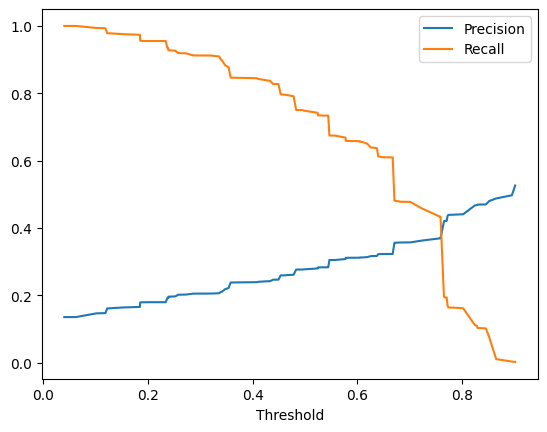

In [ ]:
# check precision/ recall threshold curve to find best threshold to ues for a more balanced model
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

prec, rec, thresh = precision_recall_curve(y_test, y_prob_rf)

plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.legend()
plt.xlabel("Threshold")
plt.show()

In [ ]:
# Stratifiedkfold for Random Forest (each fold preserves the same class ratio, good for this dataset)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=skf, scoring='roc_auc')

In [ ]:
print("Cross-Validation Scores:", scores)
print("Mean AUC:", scores.mean())

Cross-Validation Scores: [0.78546966 0.78345375 0.7852809  0.78596846 0.78457881]
Mean AUC: 0.7849503164791807


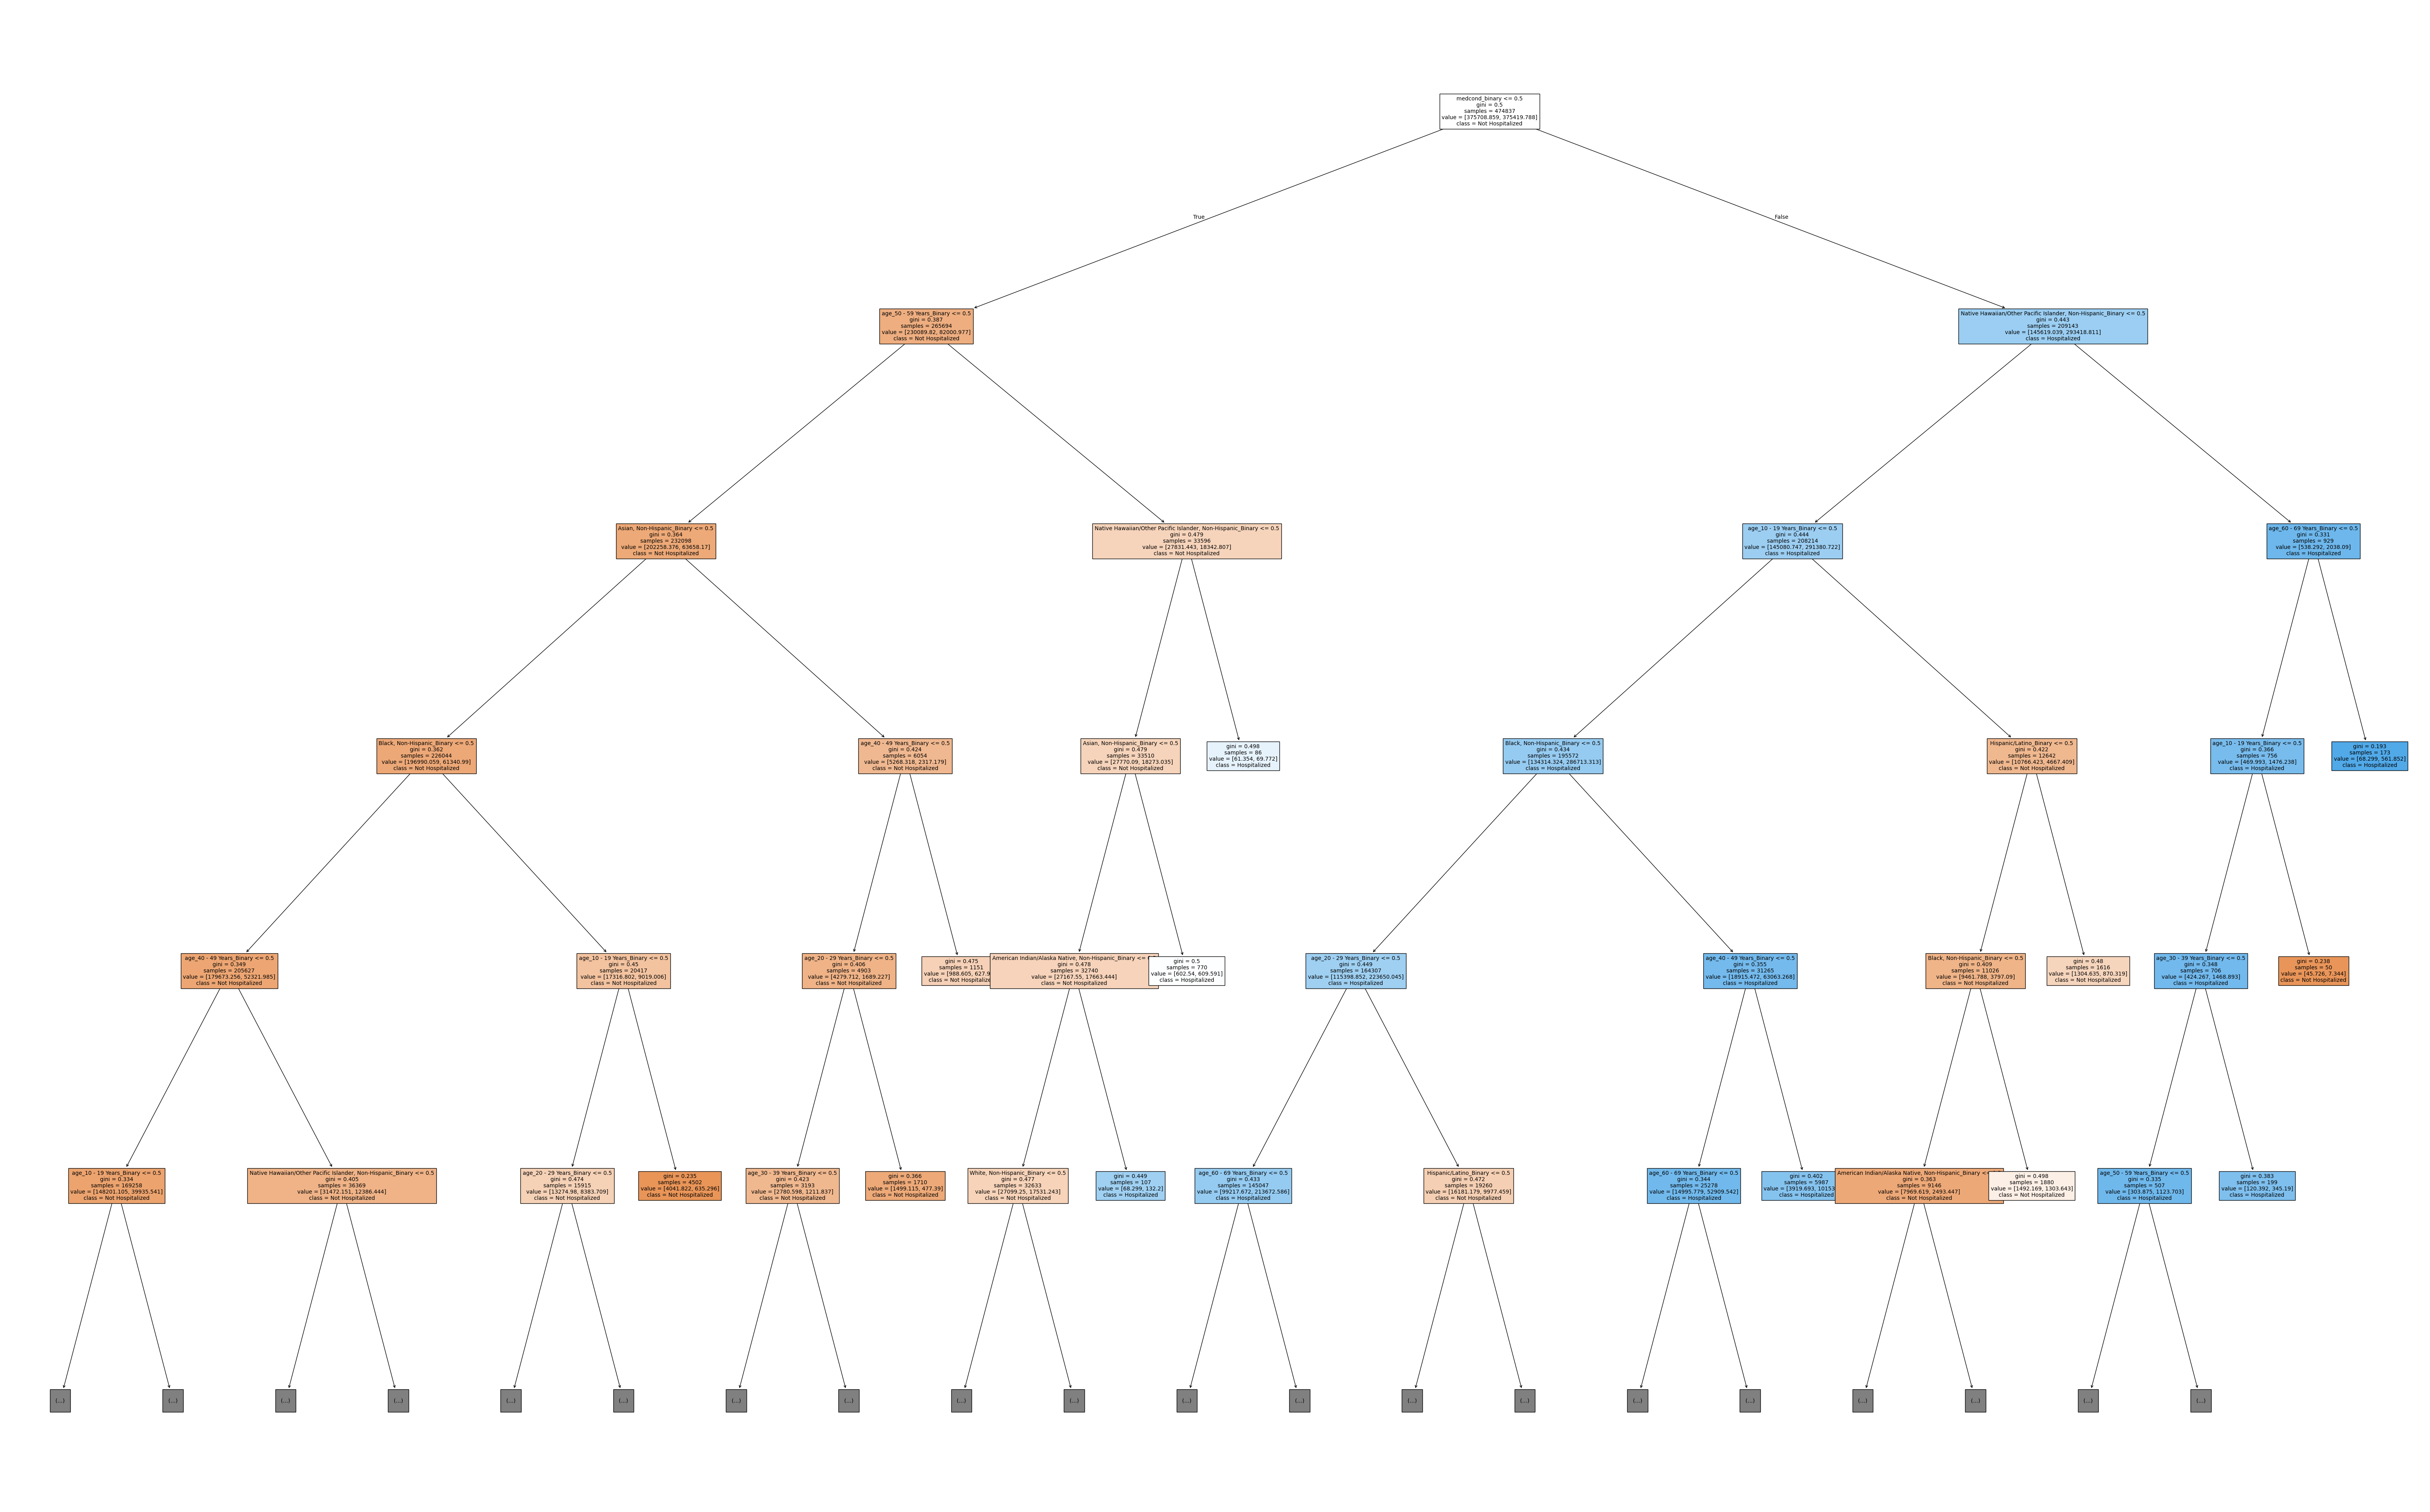

In [ ]:
plt.figure(figsize=(80, 50))
plot_tree(
    rf.estimators_[0],
    feature_names=X.columns,
    class_names=["Not Hospitalized", "Hospitalized"],
    fontsize=10,
    filled=True,
    max_depth=5
)
plt.show()

Model 2- ICU

In [ ]:
#look at underlying medical condition, age, and race to see how likely is icu
X2 = covid_df[feature_cols]

y2 = covid_df['icu_binary']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
# establish baseline using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline

reg2 = LogisticRegression(penalty = None,
                         fit_intercept=True,
                         class_weight="balanced", # handle imbalance
                         solver = 'lbfgs',
                         max_iter=500).fit(X,y)   # avoid convergence issues

# predictions
y2_pred = reg2.predict(X2_test)
y2_prob = reg2.predict_proba(X2_test)[:, 1]

print("Accuracy:", accuracy_score(y2_test, y2_pred)) #66.04%
print("ROC AUC:", roc_auc_score(y2_test, y2_prob)) #80%
print(classification_report(y2_test, y2_pred)) # precision + recall tells us that the model is good at predicting ICU cases, but also makes many false positives. Also misses some non-ICU cases

Accuracy: 0.6603668112971491
ROC AUC: 0.7998866903565326
              precision    recall  f1-score   support

           0       0.99      0.65      0.79    179566
           1       0.10      0.81      0.17      8269

    accuracy                           0.66    187835
   macro avg       0.54      0.73      0.48    187835
weighted avg       0.95      0.66      0.76    187835



In [ ]:
# compare tree to baseline
tree2 = DecisionTreeClassifier(
    min_samples_leaf=10,       # prevent tiny leaves
    class_weight="balanced",   # handle class imbalance
    max_depth=None,            # let it grow fully, we can tune later
    random_state=42
)

tree2.fit(X2_train, y2_train)

y2_pred_tree =tree2.predict(X2_test)
y2_prob_tree = tree2.predict_proba(X2_test)[:, 1]

cm2 = pd.crosstab(y2_test, y2_pred_tree, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix:\n", cm2)
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("ROC AUC:", roc_auc_score(y2_test, y2_prob_tree))
print(classification_report(y2_test, y2_pred_tree))
# overall very similar to baseline

Confusion Matrix:
 Predicted       0      1
Actual                  
0          120077  59489
1            1647   6622
Accuracy: 0.6603668112971491
ROC AUC: 0.8006556406981448
              precision    recall  f1-score   support

           0       0.99      0.67      0.80    179566
           1       0.10      0.80      0.18      8269

    accuracy                           0.67    187835
   macro avg       0.54      0.73      0.49    187835
weighted avg       0.95      0.67      0.77    187835



In [ ]:
# do a random forest to reduce overfitting and increase stability
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(n_estimators=500, # more trees bc of large dataset + more stability
                            min_samples_leaf=15, # raise it due to dataset size
                            max_depth=15, # plot is too deep with unlimited
                            min_samples_split=5, # prevents splits on very small subsets, reducing overfitting
                            class_weight="balanced",
                            random_state=42)

rf2.fit(X2_train, y2_train)

#y2_pred_rf = rf2.predict(X2_test)
#y2_prob_rf = rf2.predict_proba(X2_test)[:, 1]

y2_prob_rf = rf2.predict_proba(X2_test)[:, 1]
y2_pred_rf = (y2_prob_rf > 0.8).astype(int) # boolean comparison, threshold of 0.8, only predicts ICU case if very confident but is more balanced

cm3 = pd.crosstab(y2_test, y2_pred_rf, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix:\n", cm)

print("\nAccuracy:", accuracy_score(y2_test, y2_pred_rf))
print("ROC AUC:", roc_auc_score(y2_test, y2_prob_rf))
print("\nClassification Report:\n", classification_report(y2_test, y2_pred_rf))
# high accuracy due to prediction of non icu cases, lower precision and recall for icu cases but model is more balanced

Confusion Matrix:
 Predicted       0     1
Actual                 
0          157027  5303
1           21337  4168

Accuracy: 0.9274309899645966
ROC AUC: 0.8006556555146433

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96    179566
           1       0.19      0.19      0.19      8269

    accuracy                           0.93    187835
   macro avg       0.57      0.58      0.57    187835
weighted avg       0.93      0.93      0.93    187835



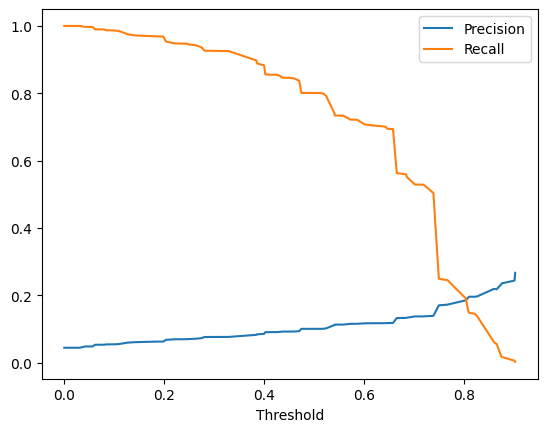

In [ ]:
# check precision/ recall threshold curve to find best threshold to ues for a more balanced model
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

prec, rec, thresh = precision_recall_curve(y2_test, y2_prob_rf)

plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.legend()
plt.xlabel("Threshold")
plt.show()

In [ ]:
# Stratifiedkfold for Random Forest (each fold preserves the same class ratio, good for this dataset)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf2, X2, y2, cv=skf, scoring='roc_auc')

In [ ]:
print("Cross-Validation Scores:", scores)
print("Mean AUC:", scores.mean())

Cross-Validation Scores: [0.80143635 0.80042014 0.80157754 0.80122757 0.80276908]
Mean AUC: 0.8014861358003753


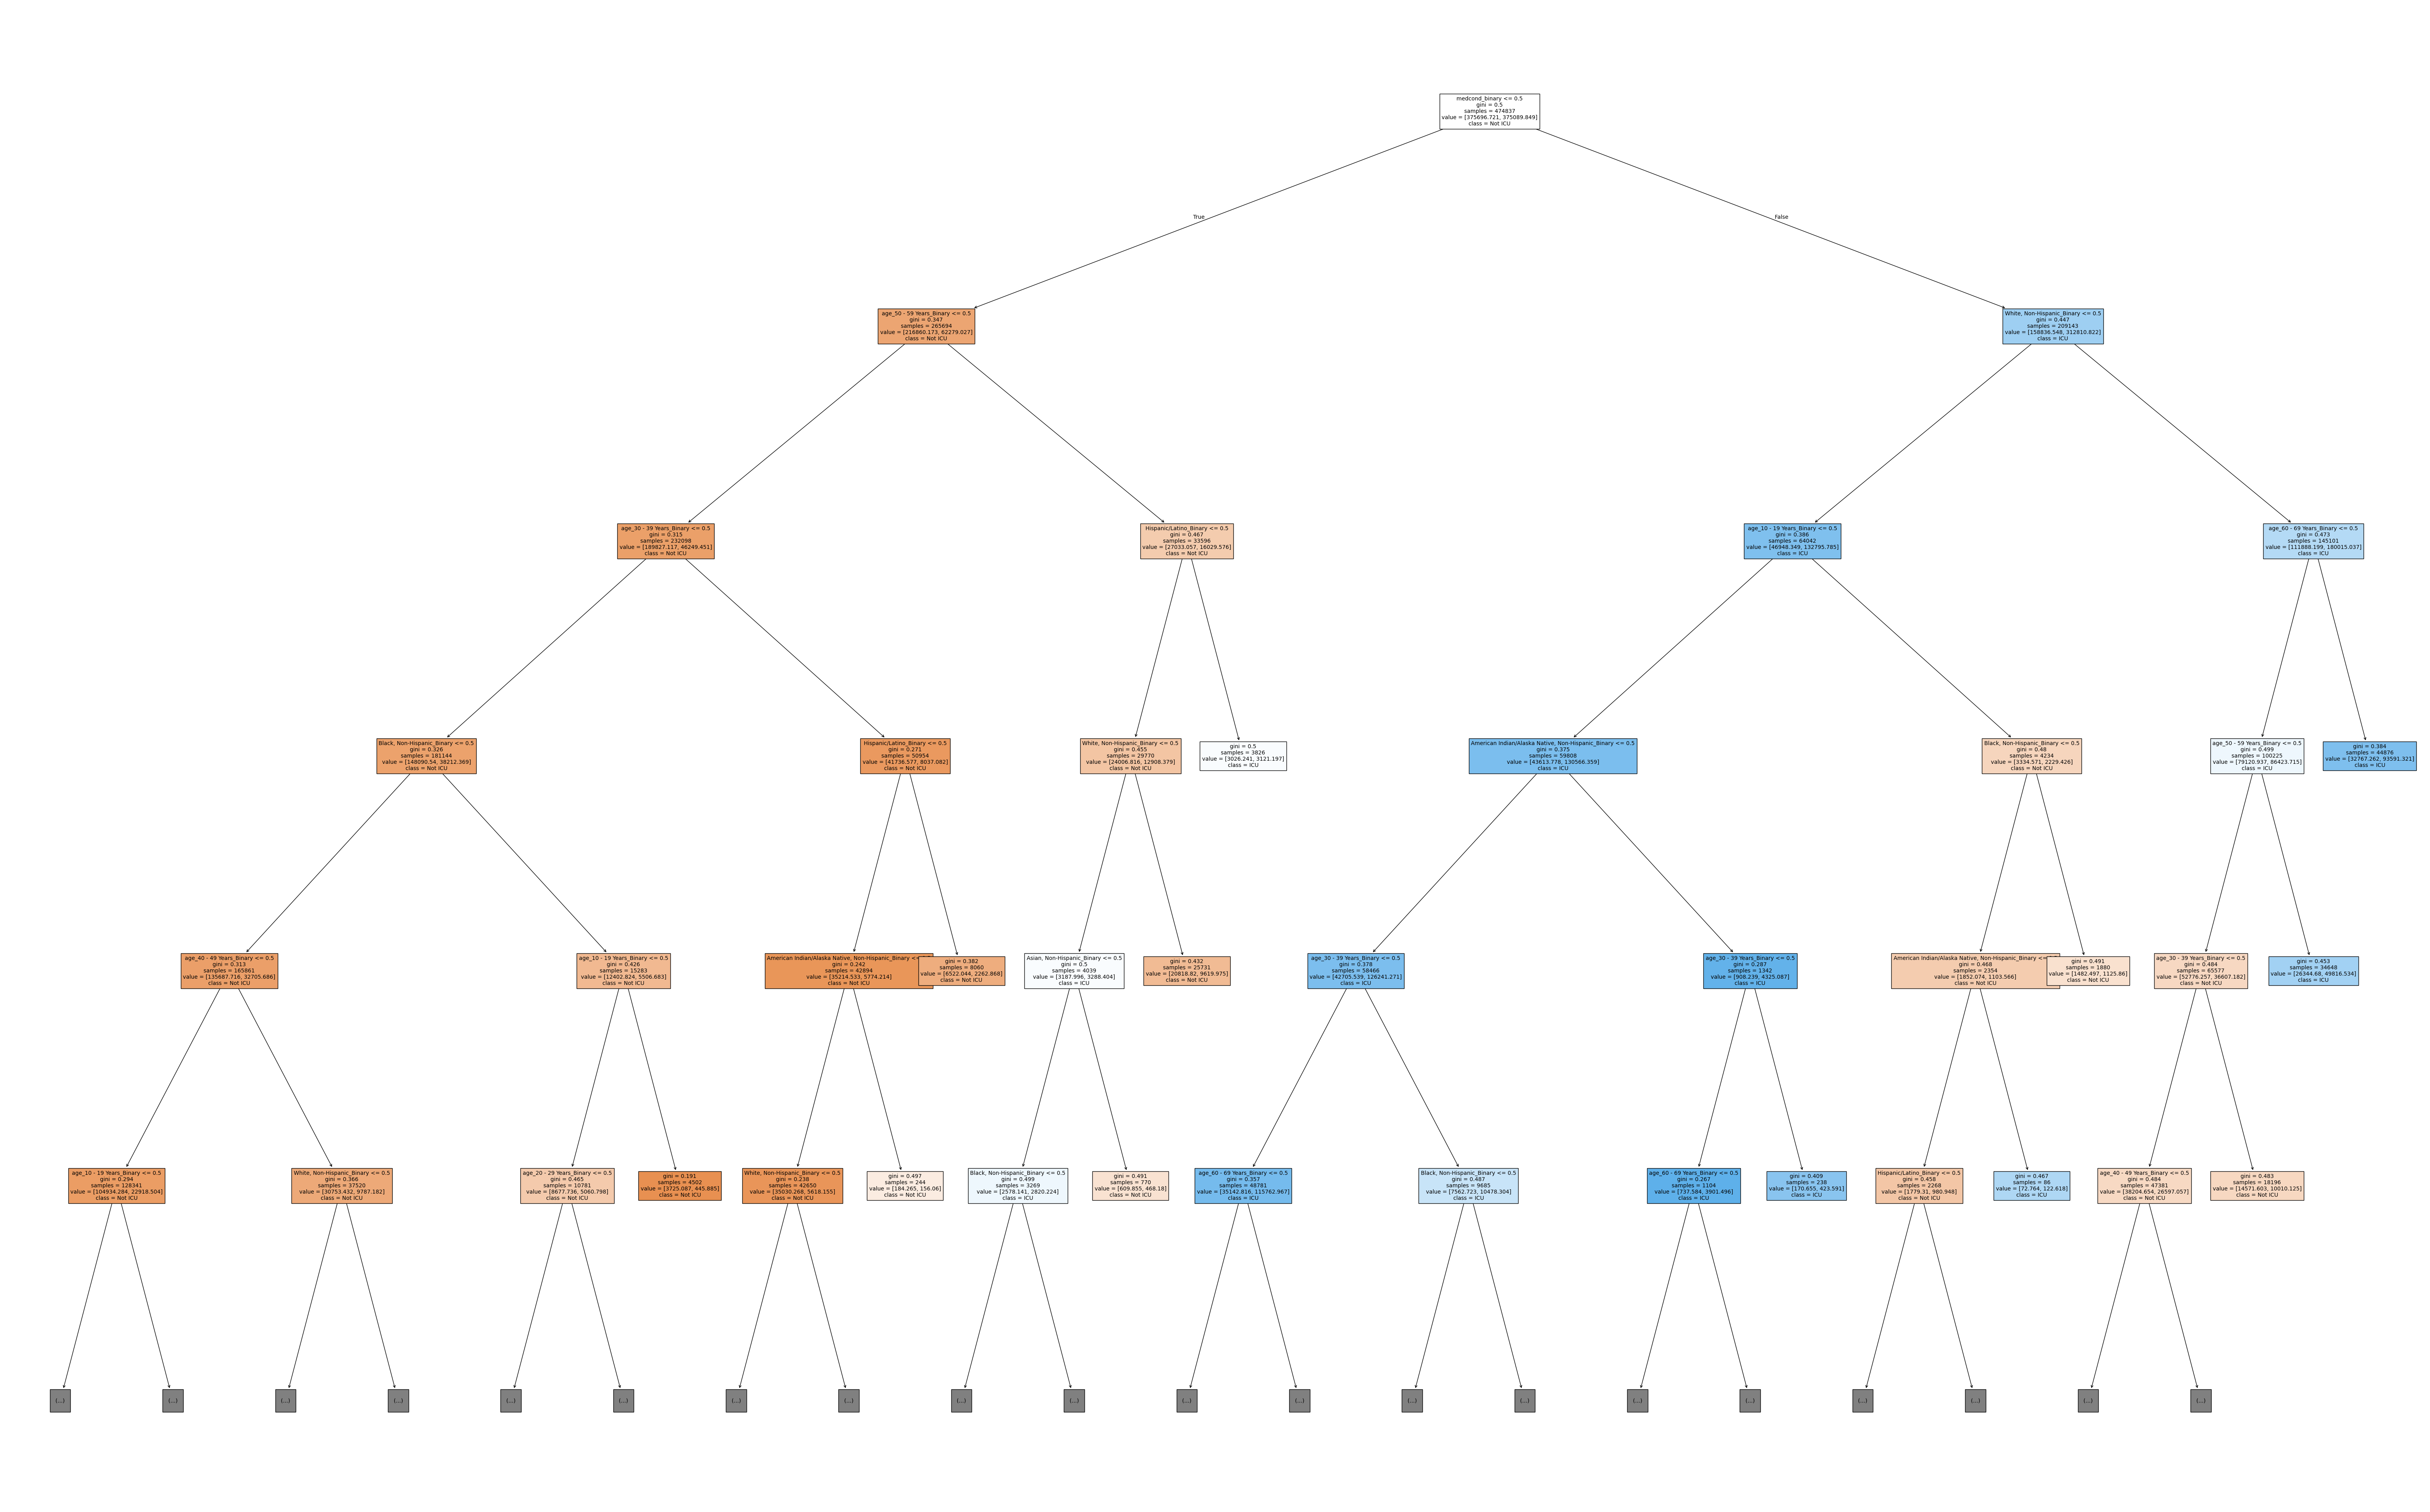

In [ ]:
plt.figure(figsize=(80, 50))
plot_tree(
    rf2.estimators_[0],
    feature_names=X2.columns,
    class_names=["Not ICU", "ICU"],
    fontsize=10,
    filled=True,
    max_depth=5
)
plt.show()

Model 3- Death

In [ ]:
# look at underlying medical condition,age,and race to see how likely is death
X3 = covid_df[feature_cols]

y3 = covid_df['death_binary']

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [ ]:
# establish baseline using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline

reg3 = LogisticRegression(penalty = None,
                         fit_intercept=True,
                         class_weight="balanced", # handle imbalance
                         solver = 'lbfgs',
                         max_iter=500).fit(X,y)   # avoid convergence issues

# predictions
y3_pred = reg3.predict(X3_test)
y3_prob = reg3.predict_proba(X3_test)[:, 1]

print("Accuracy:", accuracy_score(y3_test, y3_pred)) #65.41%
print("ROC AUC:", roc_auc_score(y3_test, y3_prob)) #84.62%
print(classification_report(y3_test, y3_pred)) #poor balance between precision and recall, many false positives

Accuracy: 0.6540740543562169
ROC AUC: 0.846194499100108
              precision    recall  f1-score   support

           0       1.00      0.65      0.78    182728
           1       0.07      0.89      0.12      5107

    accuracy                           0.65    187835
   macro avg       0.53      0.77      0.45    187835
weighted avg       0.97      0.65      0.77    187835



In [ ]:
# compare tree to baseline
tree3 = DecisionTreeClassifier(
    min_samples_leaf=10,       # prevent tiny leaves
    class_weight="balanced",   # handle class imbalance
    max_depth=None,            # let it grow fully, we can tune later
    random_state=42
)

tree3.fit(X3_train, y3_train)

y3_pred_tree =tree3.predict(X3_test)
y3_prob_tree = tree3.predict_proba(X3_test)[:, 1]

cm4 = pd.crosstab(y3_test, y3_pred_tree, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix:\n", cm3)
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("ROC AUC:", roc_auc_score(y3_test, y3_prob_tree))
print(classification_report(y3_test, y3_pred_tree))
# slightly better at balancing precision and recall, but overall similar to logistic regression

Confusion Matrix:
 Predicted       0     1
Actual                 
0          172629  6937
1            6694  1575
Accuracy: 0.6540740543562169
ROC AUC: 0.8484524248376027
              precision    recall  f1-score   support

           0       0.99      0.74      0.85    182728
           1       0.08      0.82      0.15      5107

    accuracy                           0.74    187835
   macro avg       0.54      0.78      0.50    187835
weighted avg       0.97      0.74      0.83    187835



In [ ]:
# do a random forest to reduce overfitting and increase stability
from sklearn.ensemble import RandomForestClassifier

rf3 = RandomForestClassifier(n_estimators=500, # more trees bc of large dataset + more stability
                            min_samples_leaf=20, # raise it due to dataset size
                            max_depth=20, # plot is too deep with unlimited
                            min_samples_split=5, # prevents splits on very small subsets, reducing overfitting
                            class_weight="balanced",
                            max_features="log2",
                            random_state=42)

rf3.fit(X3_train, y3_train)

#y3_pred_rf = rf3.predict(X3_test)
#y3_prob_rf = rf3.predict_proba(X3_test)[:, 1]

y3_prob_rf = rf3.predict_proba(X3_test)[:, 1]
y3_pred_rf = (y3_prob_rf > 0.7).astype(int)

cm5 = pd.crosstab(y3_test, y3_pred_rf, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix:\n", cm5)

print("\nAccuracy:", accuracy_score(y3_test, y3_pred_rf))
print("ROC AUC:", roc_auc_score(y3_test, y3_prob_rf))
print("\nClassification Report:\n", classification_report(y3_test, y3_pred_rf))
# compromise to catch more deaths but keep false positives under control

Confusion Matrix:
 Predicted       0      1
Actual                  
0          155885  26843
1            1970   3137

Accuracy: 0.8466047328772593
ROC AUC: 0.8484786745297669

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.92    182728
           1       0.10      0.61      0.18      5107

    accuracy                           0.85    187835
   macro avg       0.55      0.73      0.55    187835
weighted avg       0.96      0.85      0.90    187835



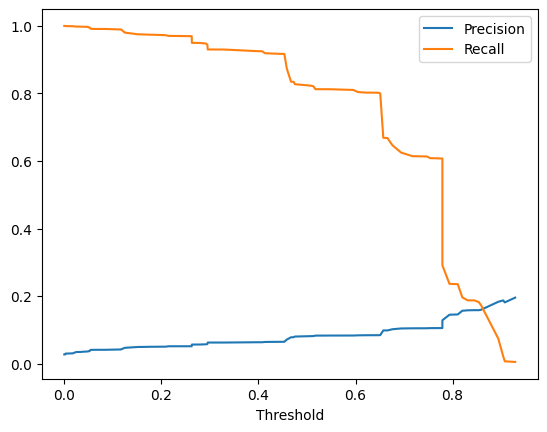

In [ ]:
# check precision/ recall threshold curve to find best threshold to ues for a more balanced model
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

prec, rec, thresh = precision_recall_curve(y3_test, y3_prob_rf)

plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.legend()
plt.xlabel("Threshold")
plt.show()

In [ ]:
# Stratifiedkfold for Random Forest (each fold preserves the same class ratio, good for this dataset)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf3, X3, y3, cv=skf, scoring='roc_auc')

In [ ]:
print("Cross-Validation Scores:", scores)
print("Mean AUC:", scores.mean())

Cross-Validation Scores: [0.84746446 0.84917981 0.8476     0.84700204 0.84963181]
Mean AUC: 0.8481756217846399


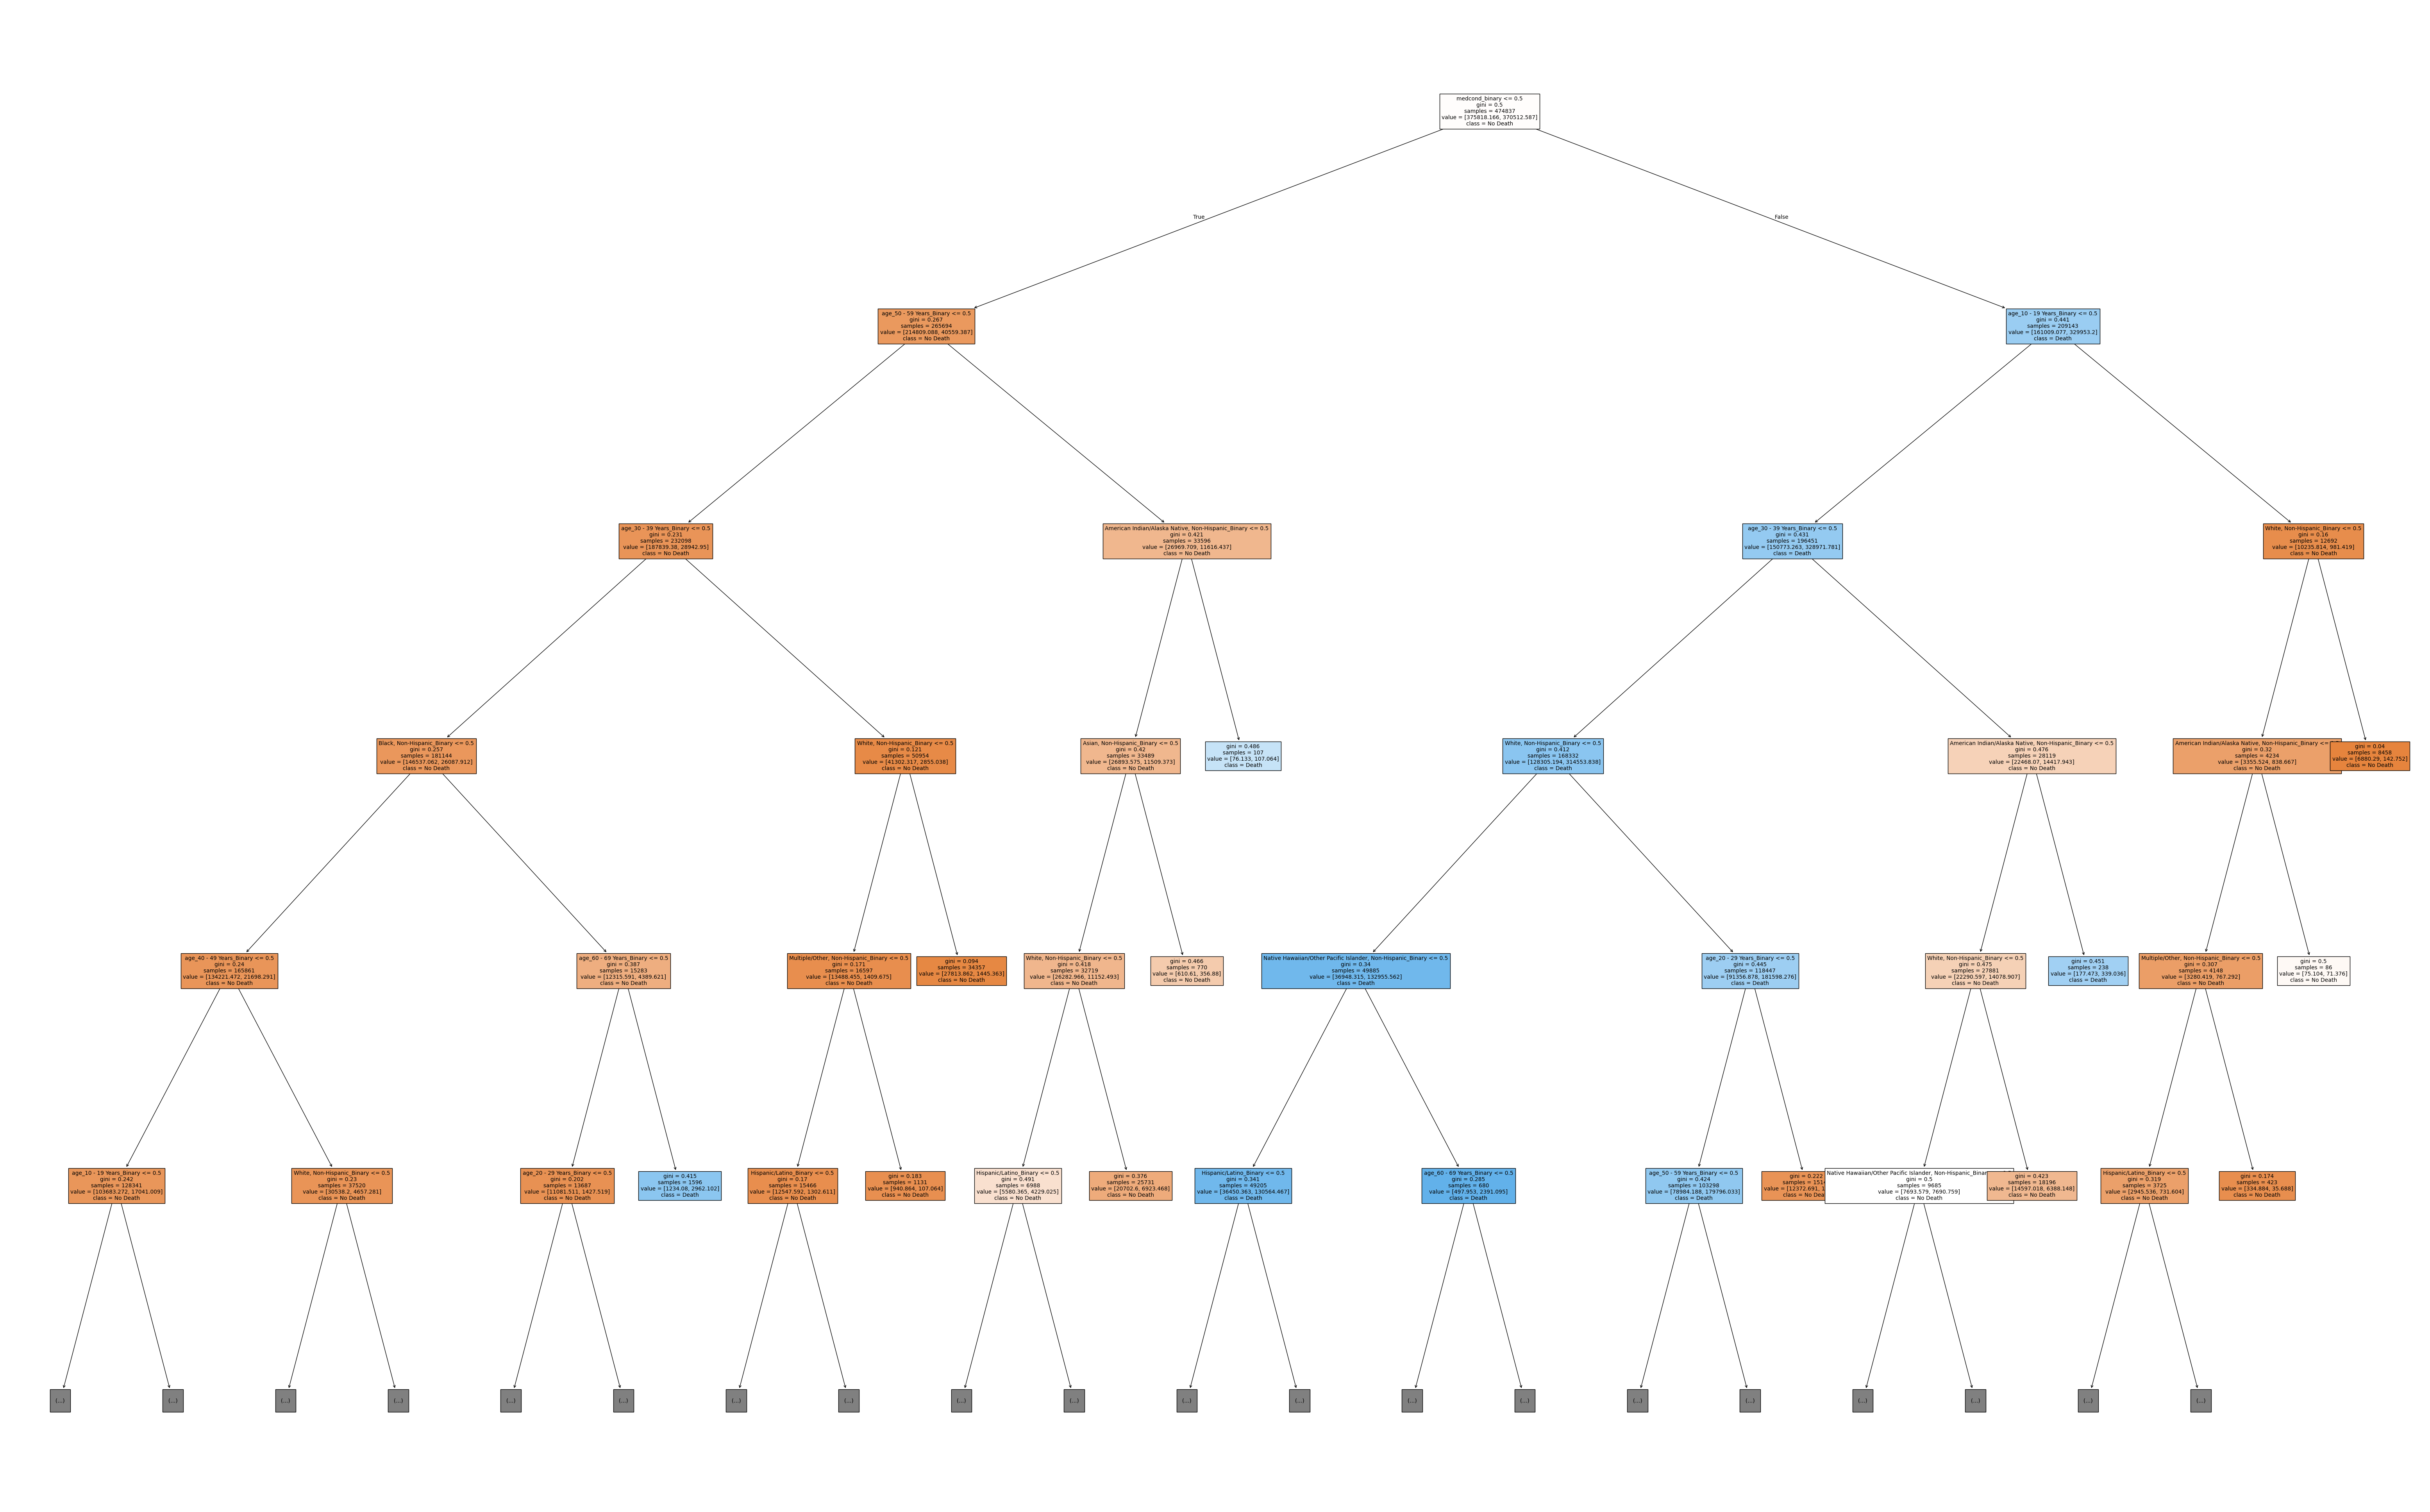

In [ ]:
plt.figure(figsize=(80, 50))
plot_tree(
    rf3.estimators_[0],
    feature_names=X3.columns,
    class_names=["No Death", "Death"],
    fontsize=10,
    filled=True,
    max_depth=5
)
plt.show()

Visualizations

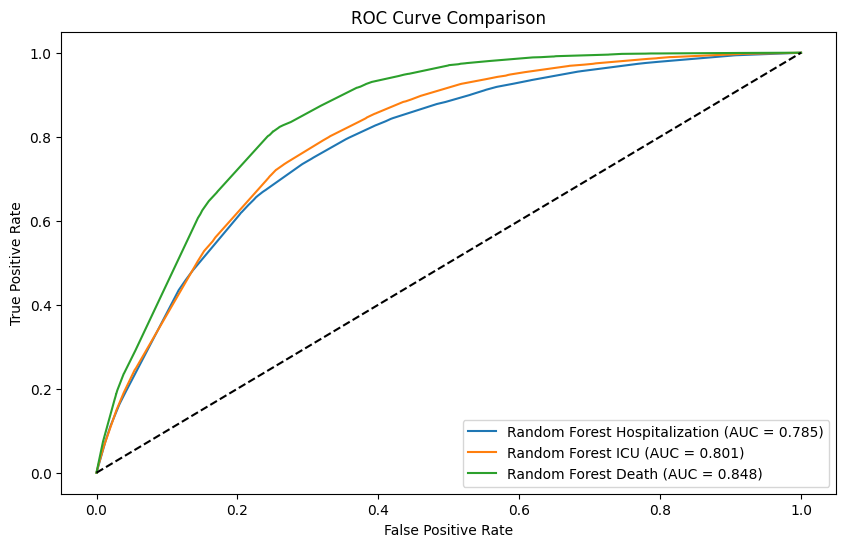

In [ ]:
#ROC curve - sensitivity vs. false positive rates across models
from sklearn.metrics import roc_curve, auc

models = {
    "Random Forest Hospitalization": (y_test, y_prob_rf),
    "Random Forest ICU": (y2_test, y2_prob_rf),
    "Random Forest Death": (y3_test, y3_prob_rf)
}

plt.figure(figsize=(10,6))

for name, (y_true, y_prob) in models.items():
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

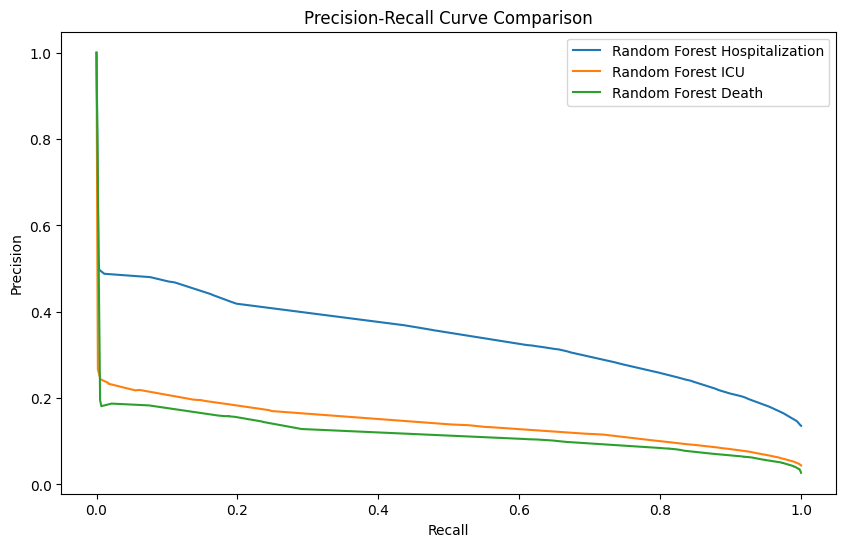

In [ ]:
# precision recall curve, show tradeoff between precision and recall for each model
from sklearn.metrics import precision_recall_curve
plt.figure(figsize=(10,6))

for name, (y_true, y_prob) in models.items():
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.plot(recall, precision, label=name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()

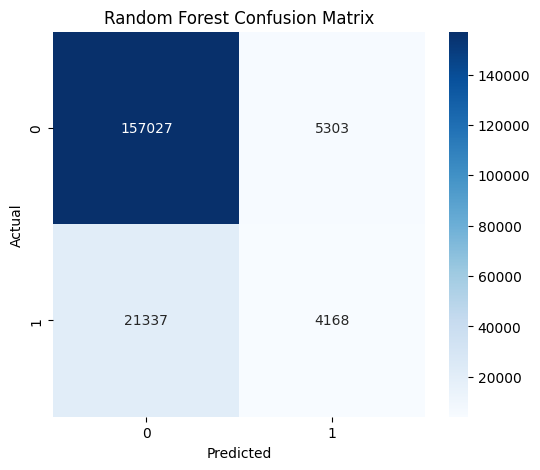

In [ ]:
# random forest heat map for hospitalization
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

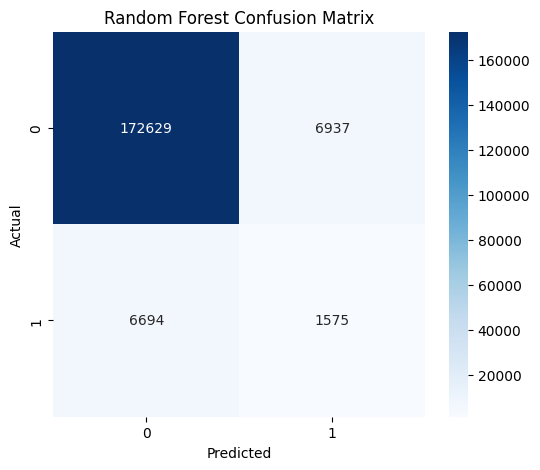

In [ ]:
#random forest heat map for icu
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

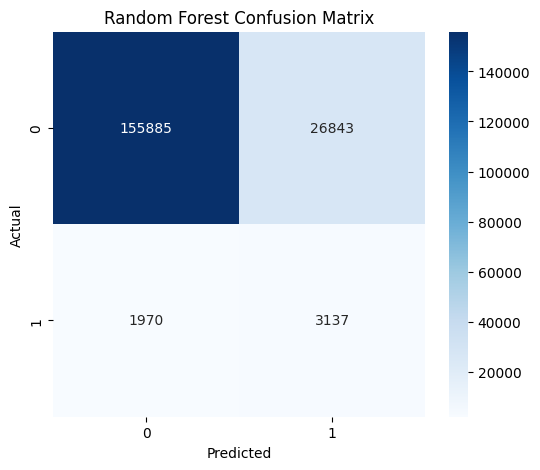

In [ ]:
#random forest heatmap for death
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(cm5, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

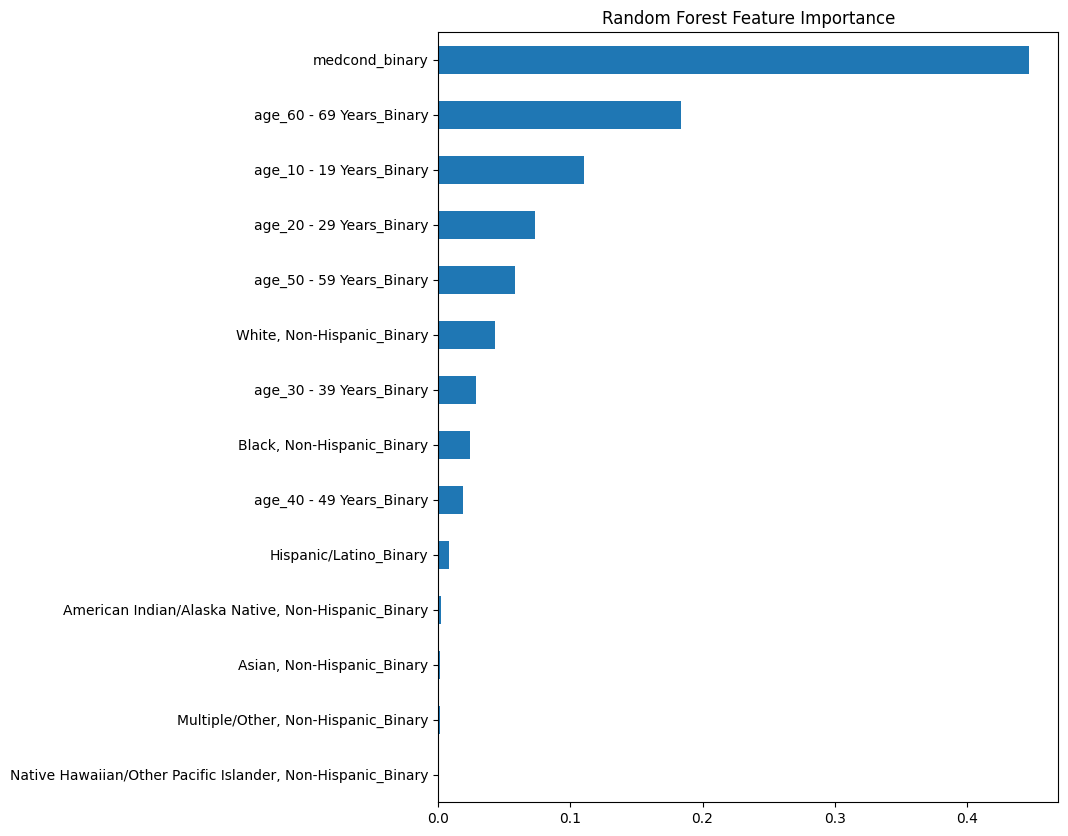

In [ ]:
# random forest feature importance for hospitalization

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,10))
plt.title("Random Forest Feature Importance")
plt.show()

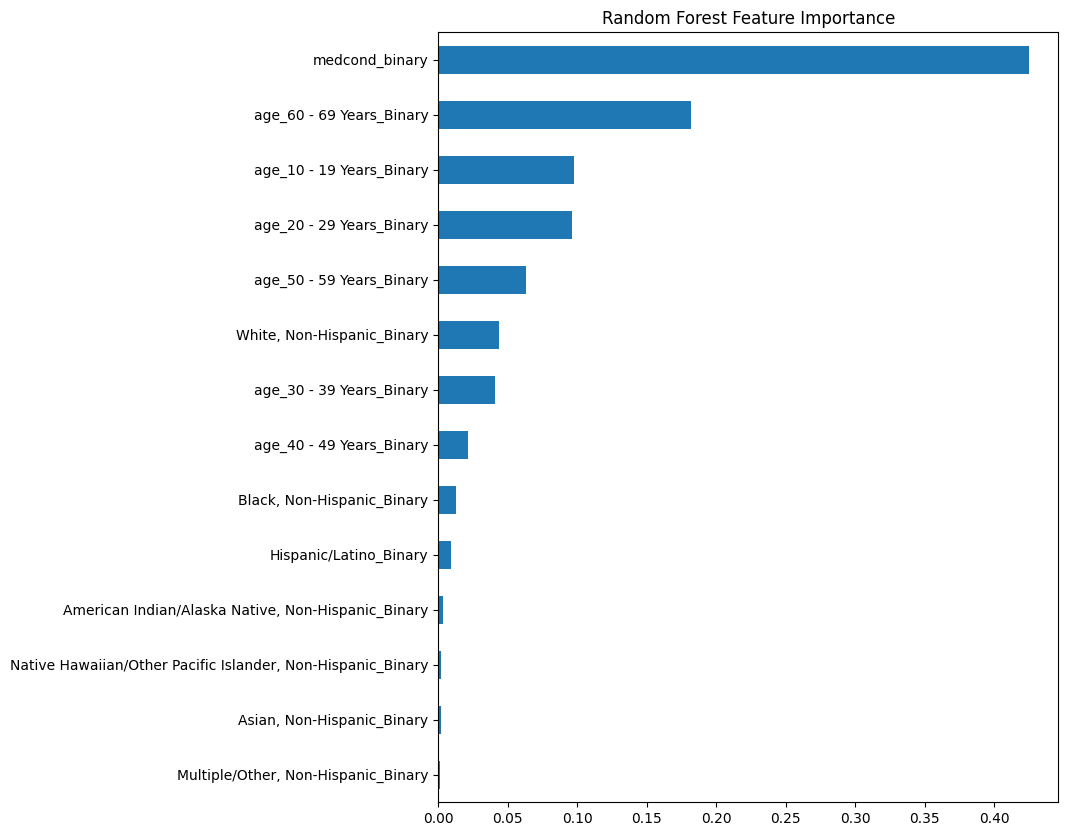

In [ ]:
# random forest feature importance for icu

importances = pd.Series(rf2.feature_importances_, index=X2.columns)
importances.sort_values().plot(kind='barh', figsize=(8,10))
plt.title("Random Forest Feature Importance")
plt.show()

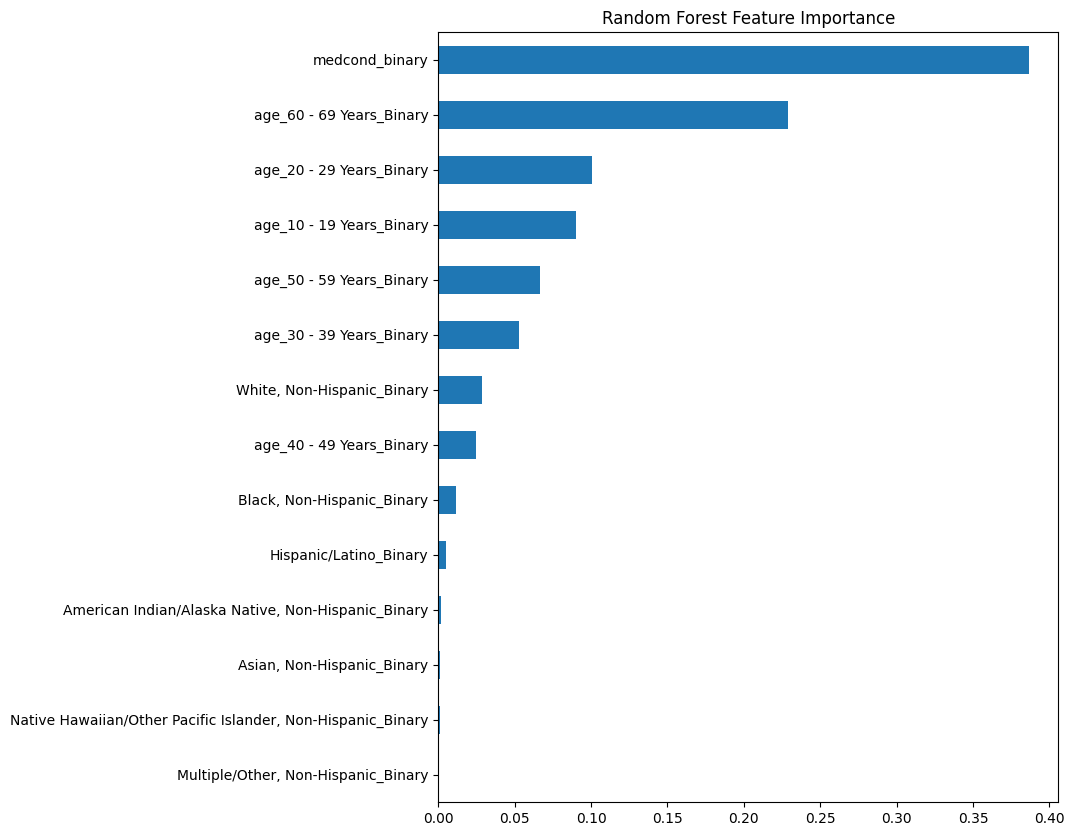

In [ ]:
# random forest feature importance for death

importances = pd.Series(rf3.feature_importances_, index=X3.columns)
importances.sort_values().plot(kind='barh', figsize=(8,10))
plt.title("Random Forest Feature Importance")
plt.show()

<BarContainer object of 6 artists>

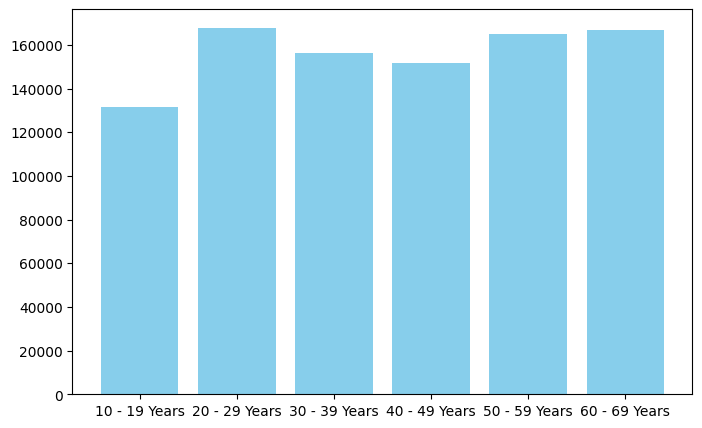

In [ ]:
# histogram of age
age_counts = covid_df['age_group'].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.bar(age_counts.index, age_counts.values, color='skyblue', label='COVID Cases')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'American Indian/Alaska Native, Non-Hispanic'),
  Text(1, 0, 'Asian, Non-Hispanic'),
  Text(2, 0, 'Black, Non-Hispanic'),
  Text(3, 0, 'Hispanic/Latino'),
  Text(4, 0, 'Multiple/Other, Non-Hispanic'),
  Text(5, 0, 'Native Hawaiian/Other Pacific Islander, Non-Hispanic'),
  Text(6, 0, 'White, Non-Hispanic')])

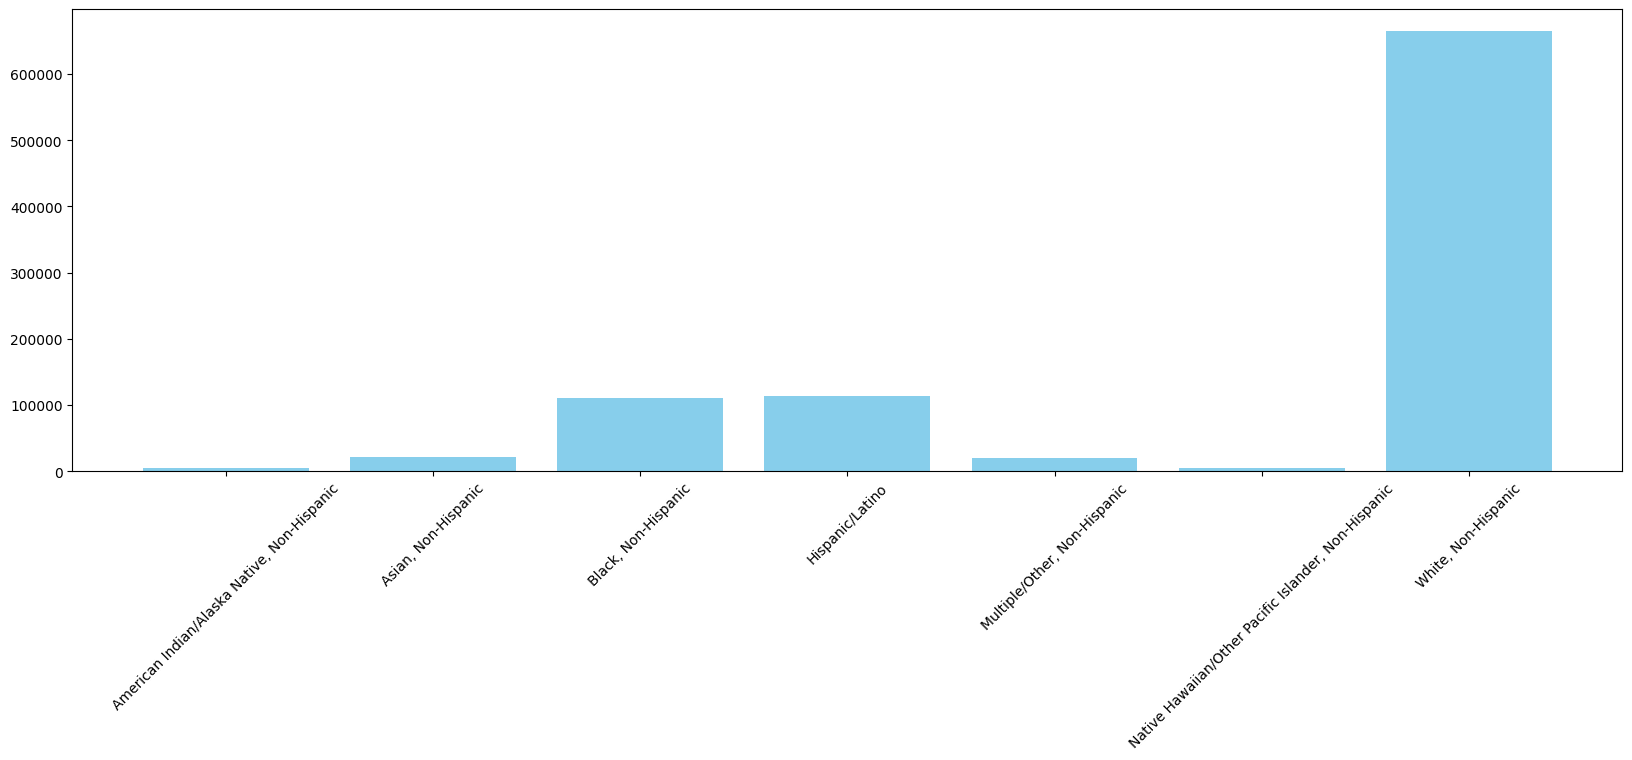

In [ ]:
# histogram of race
race_counts = covid_df['race_ethnicity_combined'].value_counts().sort_index()
plt.figure(figsize=(20,6))
plt.bar(race_counts.index, race_counts.values, color='skyblue', label='COVID Cases')
plt.xticks(rotation=45)